# ABEL WakeT example

By Carl A. Lindstrøm (University of Oslo), 29 Aug 2025

### Import ABEL framework

In [1]:
from abel import *

### Define the input beams

In [2]:
# define drive bunch
driver_source = SourceBasic()
driver_source.charge = -2e-9 # [C]
driver_source.energy = 14e9 # [eV]
driver_source.rel_energy_spread = 0.01
driver_source.bunch_length = 20e-6 # [m]
driver_source.z_offset = 100e-6 # [m]
driver_source.emit_nx, driver_source.emit_ny = 20e-6, 20e-6 # [m rad]
driver_source.beta_x, driver_source.beta_y = 0.5, 0.5 # [m]
driver_source.num_particles = 100000
driver_source.symmetrize = True
driver_source.x_angle = 10e-6 # [rad]
driver_source.y_offset = 1e-6 # [m]

# define stage
stage = StageWakeT()
stage.driver_source = driver_source
stage.nom_accel_gradient_flattop = 6e9 # [m]
stage.nom_energy_gain = 9e9 # [eV]
stage.plasma_density = 1e22 # [m^-3]
stage.ramp_beta_mag = 5.0
stage.upramp = PlasmaRamp()
stage.downramp = PlasmaRamp()

# define witness bunch
source = SourceBasic()
source.charge = -0.6e-9 # [C]
source.energy = 25e9 # [eV]
source.rel_energy_spread = 0.01
source.bunch_length = 10e-6 # [m]
source.z_offset = -160e-6 # [m]
source.emit_nx, source.emit_ny = 10e-6, 10e-6 # [m rad]
source.beta_x = stage.matched_beta_function(source.energy)
source.beta_y = source.beta_x
source.num_particles = 20000

# define linac
linac = PlasmaLinac()
linac.source = source
linac.stage = stage
linac.num_stages = 1

### Perform linac tracking

In [3]:
# perform experiment tracking
beam = linac.run('waket_example', overwrite=True)

Tracked #0  SourceBasic             (s =    0.0 m) :   E =  25.0 GeV, Q = -0.60 nC, σz =   9.9 µm, σE =  1.0%, ε =  9.99/ 10.01 mm-mrad


/Users/carlal/UiO/Code/software/ABEL/abel/classes/stage/stage.py:1355: UserWarning: Main beam may not have been accurately rotated in the zy-plane.


Plasma stage: 100%|███████████████████████████████████████████████████████████████████| 1.626475/1.626475 m [02:41]
    ... #1  StageWakeT #1           (s =    1.6 m) :   E =  35.3 GeV, Q = -0.60 nC, σz =   9.9 µm, σE =  1.2%, ε = 10.04/ 10.01 mm-mrad


### Plot the wakefield

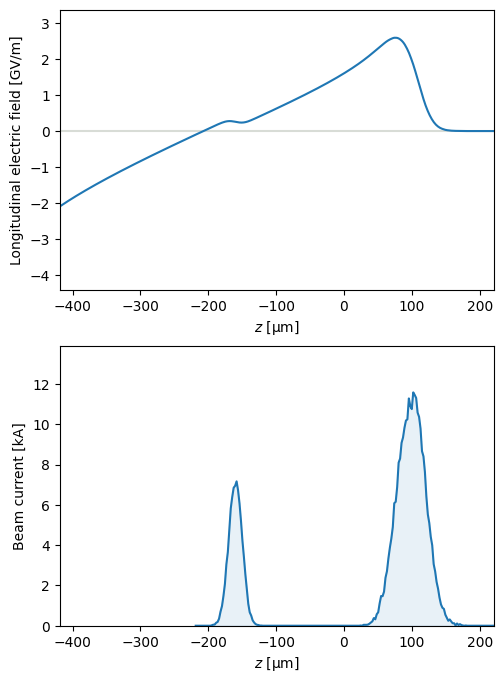

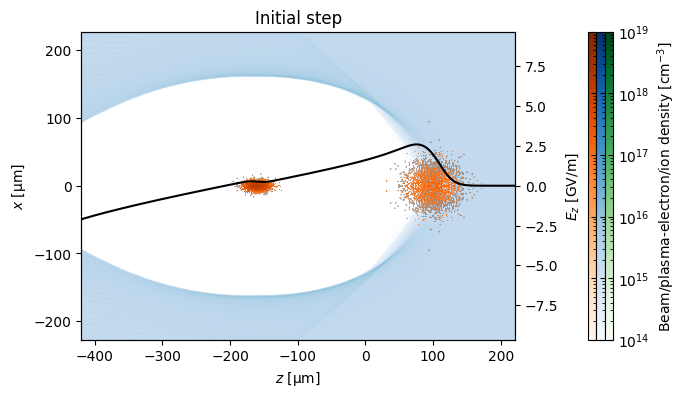

In [4]:
# plot wakefield (at the start, including the ramp)
linac.stage.plot_wakefield()
linac.stage.plot_wake()

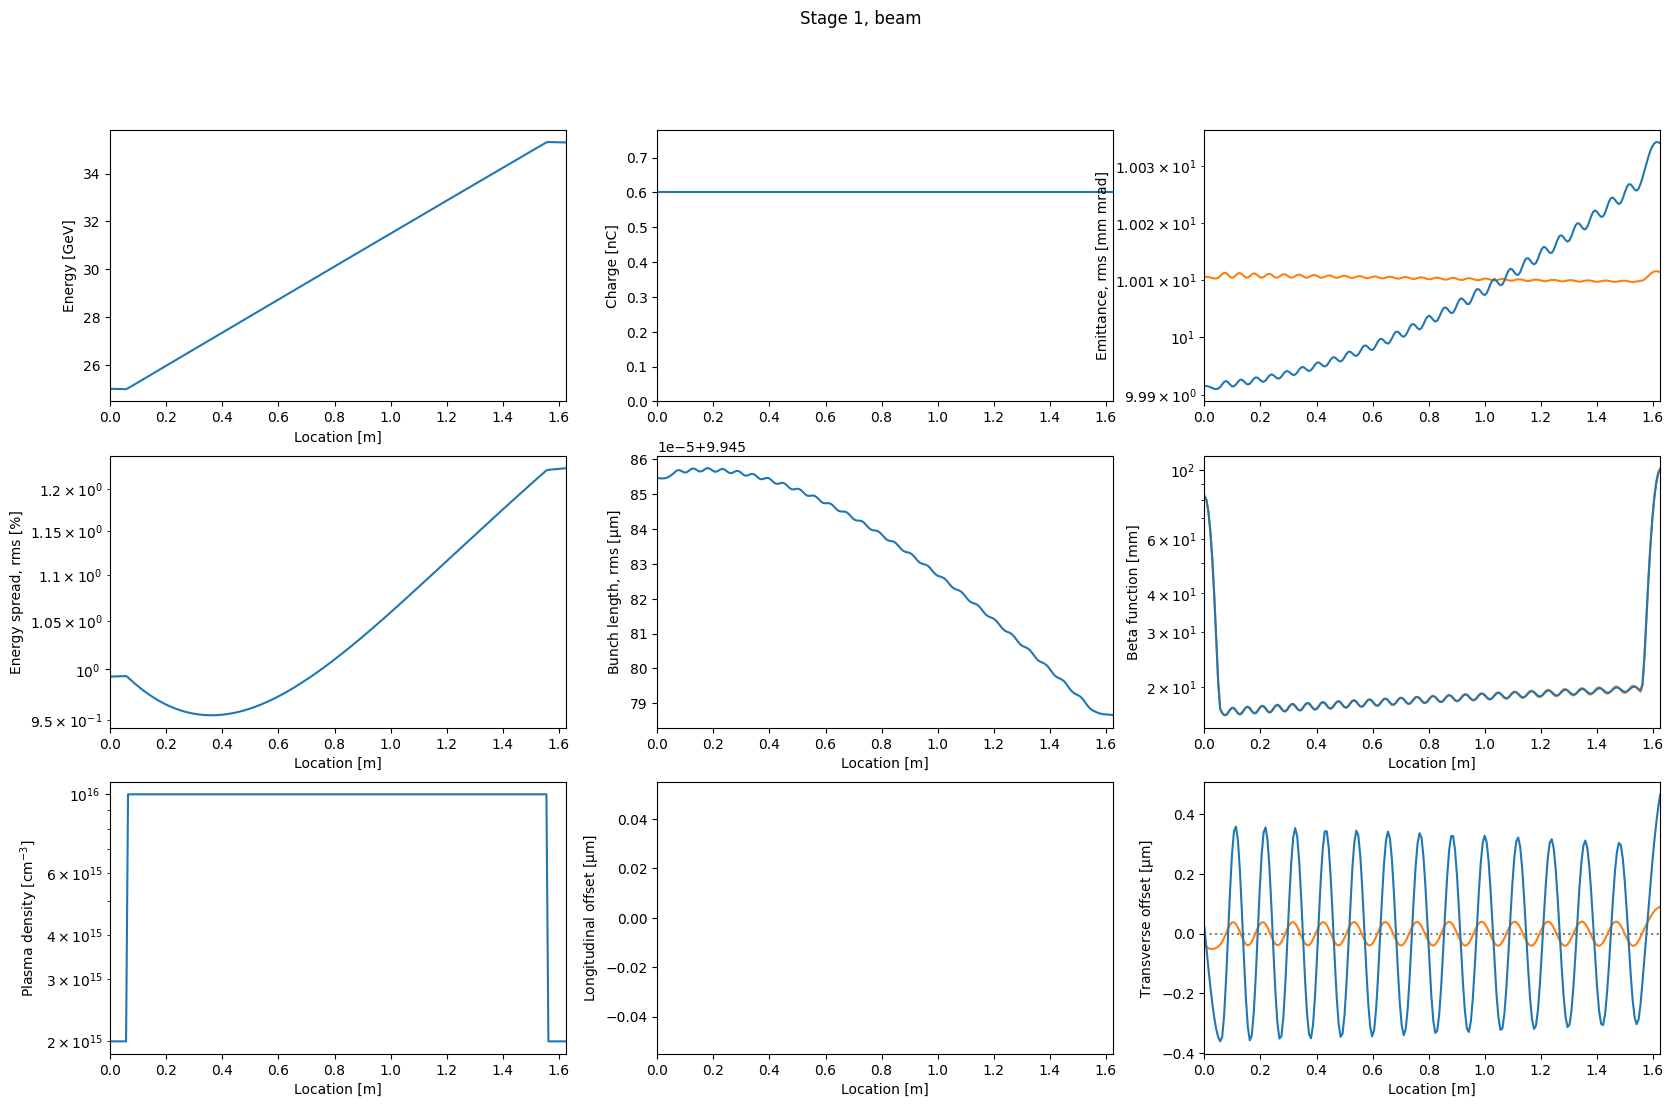

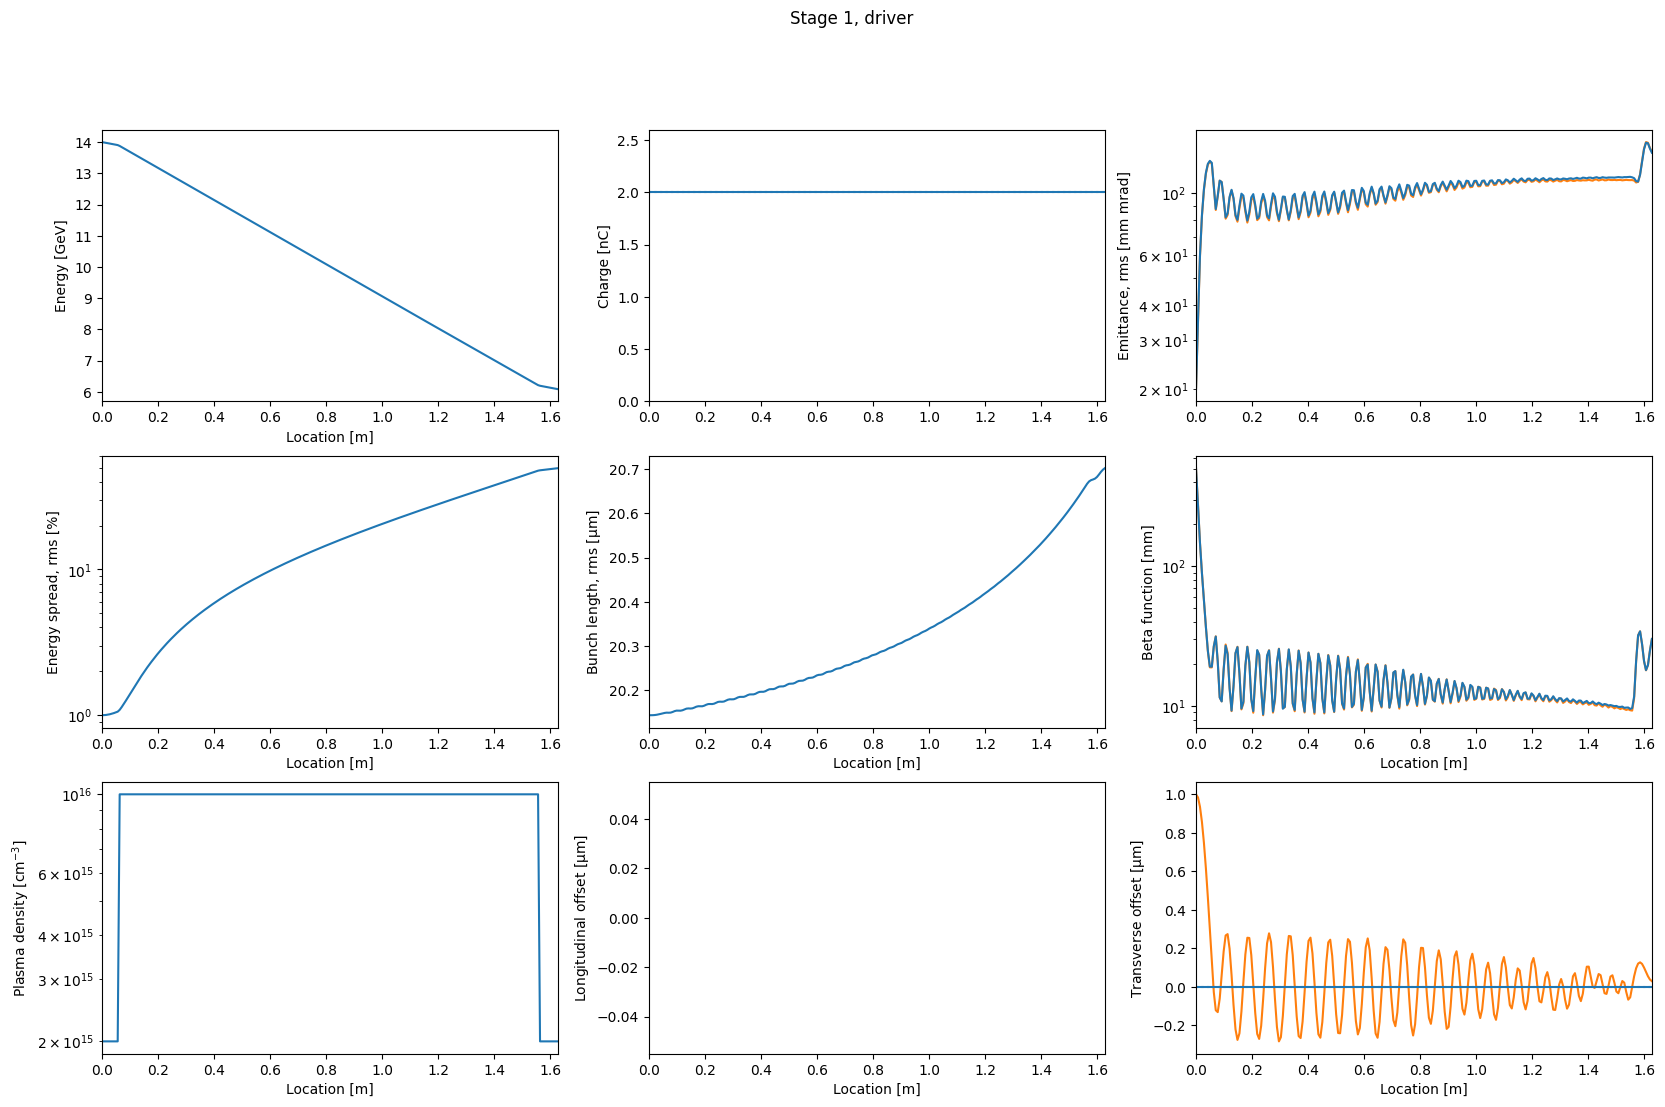

In [5]:
# plot the beam and driver evolution
linac.stage.plot_evolution()
linac.stage.plot_driver_evolution()

### Plot longitudinal phase space

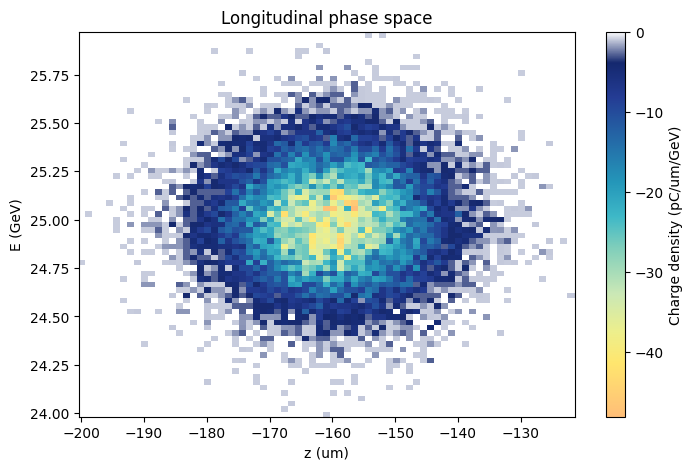

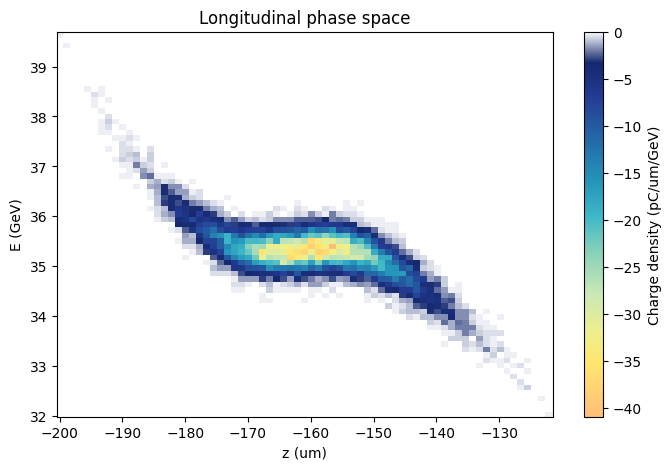

In [6]:
# plot the longitudinal phase space (at the beginning and end of the stage)
linac.initial_beam.plot_lps()
linac.final_beam.plot_lps()